In [13]:
import numpy as np
import random

In [21]:
#calculates gradient using all points, takes a mean gradient in a single iteration

def step_gradient(b_current,m_current,points,learningRate):
    b_gradient=0
    m_gradient=0
    N=len(points)
    for i in range(0,N):
        x=points[i,0]
        y=points[i,1]
            
        b_gradient+=-(2/N)*(y-(m_current*x+b_current))
        m_gradient+=-(2/N)*x*(y-(m_current*x+b_current))
    new_b=b_current-(learningRate*b_gradient)
    new_m=m_current-(learningRate*m_gradient)
    return [new_b,new_m]

In [19]:
def gradient_descent_runner(points,starting_b,starting_m,learningRate,num_iterations):
    b=starting_b
    m=starting_m
    colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(num_iterations):
        b,m=step_gradient(b,m,points,learningRate)
        
        
        x_initial=points[:,0]
        y_initial=points[:,1]
        y_pred=x_initial*m+b
        plt.scatter(x_initial,y_initial)
        
        plt.plot(x_initial,y_pred,color=random.choice(colors))
        plt.show()
            
        
        
    return [m,b]
    

In [18]:
def cost_function(m,b,points):
    totalCost=0
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1]
        totalCost+=(y-(m*x+b))**2
    return totalCost/len(points)
    

In [17]:
def run():
    points=np.genfromtxt("data.csv",delimiter=",")
    learningRate=0.0001
    initial_b=0   #initial y-intercept guess
    initial_m=0   #initial slope guess
    num_iterations=10
    
    print(cost_function(initial_m,initial_b,points))
    final_m,final_b=gradient_descent_runner(points,initial_b,initial_m,learningRate,num_iterations)
    print(cost_function(final_m,final_b,points))
    print(final_b,final_m)
    
    #plotting
    x_initial=points[:,0]
    y_initial=points[:,1]
    #plt.scatter(x_initial,y_initial)
    
    y_pred=final_m*x_initial+final_b
    
    
    #plt.plot(x_initial,y_pred)
    #plt.show()
    
    
    
    

5565.10783448


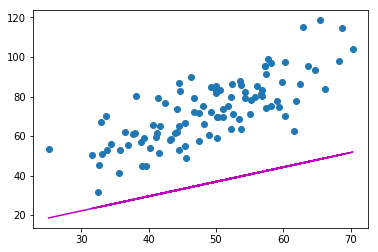

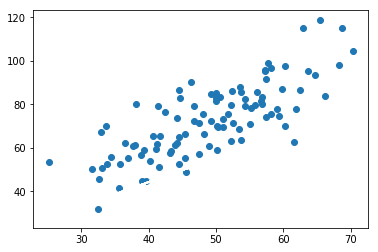

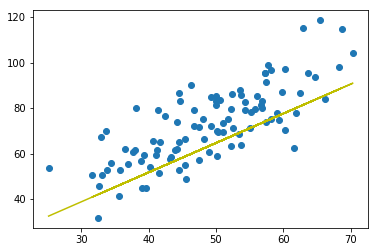

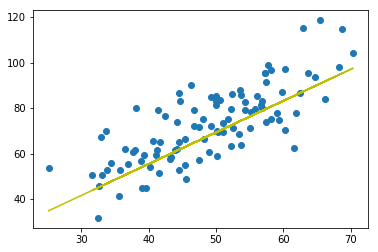

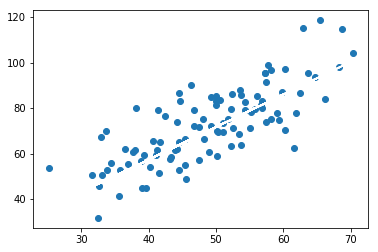

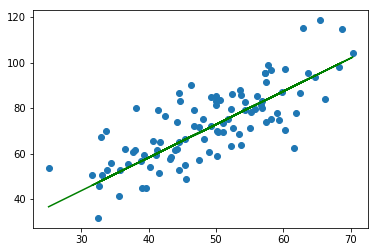

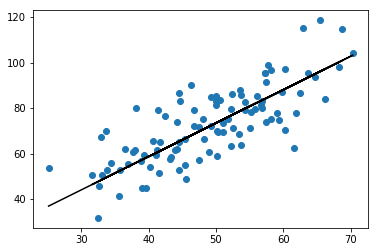

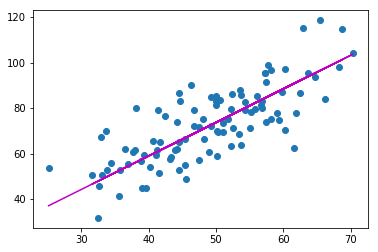

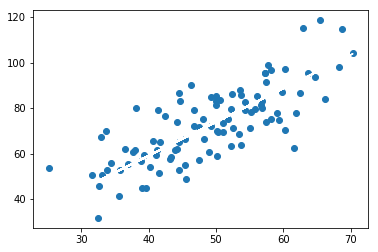

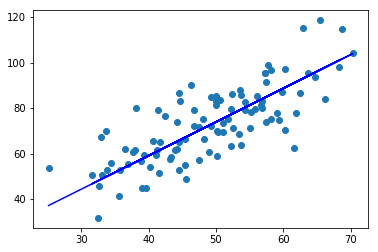

112.655851815
0.0296393478747 1.47741737555


In [22]:
run()

In [1]:
from sklearn import datasets

import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix as cm

In [3]:
from sklearn.metrics import classification_report

In [4]:
iris=datasets.load_iris()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn import cross_validation as cv

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
x_train,x_test,y_train,y_test=cv.train_test_split(iris.data,iris.target,test_size=0.2)

In [8]:
clf=LinearRegression()

In [9]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred=clf.predict(x_test).astype(int)
type(y_pred)
y_pred
y_test


array([1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 2, 0, 0, 1])

In [11]:
cm(y_pred,y_test)  #confusion_matrix

array([[11,  2,  0],
       [ 0, 11,  3],
       [ 0,  0,  3]])

In [12]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92        11
          1       0.79      0.85      0.81        13
          2       1.00      0.50      0.67         6

avg / total       0.85      0.83      0.82        30



In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
from sklearn.svm import SVC

# iris dataset is a classification problem, that's why we use svc for classifier

In [183]:
clf=SVC()
clfr=LinearRegression()


In [184]:
scores=cross_val_score(clf,iris.data,iris.target,cv=5)

In [185]:
scores

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

In [186]:
scores.mean()

0.98000000000000009

In [187]:
plt.plot